# Networkx

### Documentation
https://networkx.github.io/documentation/stable/index.html

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

### Lav en graf

In [10]:
G = nx.Graph()
print(type(G))

<class 'networkx.classes.graph.Graph'>


### Visualiser grafen


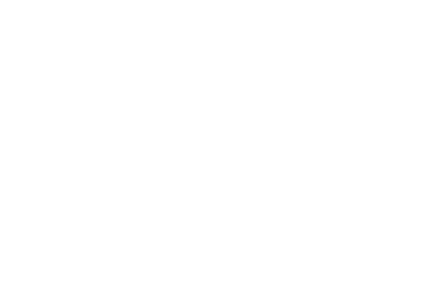

In [6]:
nx.draw(G)
plt.show()

### Tilføj nodes og edges enkeltvis

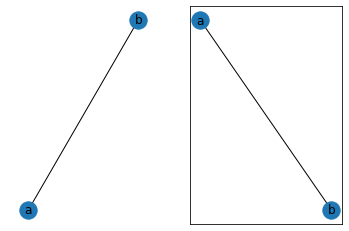

In [11]:
G.add_node("a")
G.add_node("b")
G.add_edge("a","b")

fig, (ax1,ax2) = plt.subplots(1,2)
nx.draw(G,with_labels=True,ax = ax1)
nx.draw_networkx(G,ax = ax2)
plt.show()

### Tilføj nodes og edges fra et subscriptable objekt
Dvs. string, tuple, list eller dict

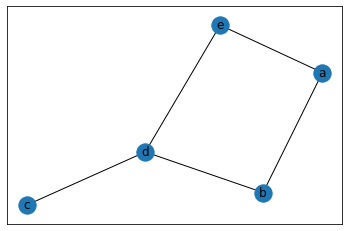

In [12]:
nodes = ["c","d","e"]
edges = [("a","e"),("b","d"),("c","d"),("d","e")]
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw_networkx(G)
plt.show()

In [14]:
print(G.nodes(), "\n", "Antallet af nodes: ", G.number_of_nodes())
print(G.edges(), "\n", "Antallet af edges: ", G.number_of_edges())
print("Naboer til a: ", list(G.adj["d"]))

['a', 'b', 'c', 'd', 'e'] 
 Antallet af nodes:  5
[('a', 'b'), ('a', 'e'), ('b', 'd'), ('c', 'd'), ('d', 'e')] 
 Antallet af edges:  5
Naboer til a:  ['b', 'c', 'e']


### Degree

In [15]:
print("Graden af alle knuder i G: ", G.degree())
print("Graden af knude a: ", G.degree("a"))

Graden af alle knuder i G:  [('a', 2), ('b', 2), ('c', 1), ('d', 3), ('e', 2)]
Graden af knude a:  2


## Isolerede knuder

In [66]:
print(nx.isolates(G))

<generator object isolates.<locals>.<genexpr> at 0x7fa987dc1308>


In [65]:
G.add_nodes_from(['f','g'])
print(list(nx.isolates(G)))

['f', 'g']


In [68]:
G.remove_nodes_from(list(nx.isolates(G)))
G.nodes()

NodeView(('a', 'b', 'c', 'd', 'e'))

## Adjacency matrix og Incidence matrix

In [69]:
A = nx.adjacency_matrix(G) #Giver en sparse matrix
M = nx.incidence_matrix(G)
print("Adjacency matrix: ", "\n", A.todense())
print("Incidence matrix: ", "\n", M.todense())

Adjacency matrix:  
 [[0 1 0 0 1]
 [1 0 0 1 0]
 [0 0 0 1 0]
 [0 1 1 0 1]
 [1 0 0 1 0]]
Incidence matrix:  
 [[1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 1. 0. 0. 1.]]


## Kredsløb, simple stier og grids

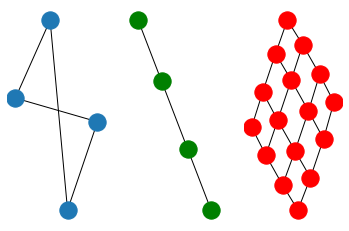

In [70]:
C=nx.cycle_graph(4)
P=nx.path_graph(4)

#4x4 grid
grid = nx.grid_2d_graph(4,4)

fig, (ax1,ax2,ax3) = plt.subplots(1,3)
nx.draw(C,ax=ax1)
nx.draw(P,ax=ax2, node_color="g")
nx.draw(grid,ax=ax3, node_color= "r")
plt.show()

In [71]:
from networkx.algorithms import tree
print(tree.recognition.is_tree(C), tree.recognition.is_tree(P))

False True


## Tilfældige grafer

True


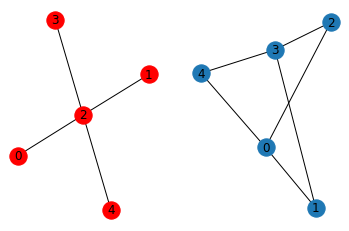

In [115]:
from networkx import generators
rand_tree = generators.trees.random_tree(5)
rand_graph = generators.random_graphs.gnm_random_graph(5,6)

print( tree.recognition.is_tree(rand_tree))
fig, (ax1, ax2) = plt.subplots(1,2)
nx.draw(rand_tree, ax=ax1, node_color="r", with_labels=True)
nx.draw(rand_graph, ax=ax2, with_labels=True)
plt.show()

## Bipartite graf

In [117]:
from networkx.algorithms import bipartite
B = nx.Graph()
#Kan tilføje attributer til knuder. Kunne f.eks. også være weights
B.add_nodes_from(["x1","x2","x3"], bipartite = 0)
B.add_nodes_from(["y1", "y2"], bipartite = 1)

edges = [("x1", "y1"), ("x1", "y2"), ("x2", "y1"), ("x3", "y2")]
B.add_edges_from(edges)
print(nx.bipartite.is_bipartite(B)) # False hvis ikke den er bipartite

True


In [118]:
print(B.nodes(data=True))
# Sets and color raises error hvis grafen ikke er bipartite
X, Y = nx.bipartite.sets(B)
print("X: ",X, "\n", "Y: ",  Y)
colors = nx.bipartite.color(B)
print(colors)

[('x1', {'bipartite': 0}), ('x2', {'bipartite': 0}), ('x3', {'bipartite': 0}), ('y1', {'bipartite': 1}), ('y2', {'bipartite': 1})]
X:  {'x3', 'x2', 'x1'} 
 Y:  {'y1', 'y2'}
{'x1': 1, 'y1': 0, 'y2': 0, 'x3': 1, 'x2': 1}


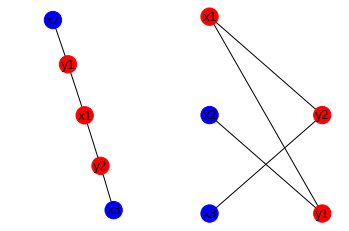

In [121]:
pos = dict()
pos.update((n, (0, idx*10)) for idx, n in enumerate(X))
pos.update((n, (0.5, idx*10)) for idx, n in enumerate(Y))

#Bemærk nx.bipartite.color ændrer rækkefølge, så man kan ikke benytte denne list comprehension
#color = ["r" if colors[key] == 1 else "b" for key in colors]
color = ["r" if node[1]['bipartite'] == 1 else "b" for node in B.nodes(data=True)]
fig, (ax1, ax2) = plt.subplots(1,2)
nx.draw(B, with_labels = True, ax = ax1, node_color = color)
nx.draw(B,pos = pos, with_labels=True, ax = ax2, node_color = color)#, nodelist=colors)

plt.show()

## Complete graphs

In [122]:
K_4 = nx.complete_graph(4)
K_3_3 = nx.complete_bipartite_graph(3,3)

print(nx.bipartite.is_bipartite(K_3_3)) #
print(K_3_3.nodes(data=True))


True
[(0, {'bipartite': 0}), (1, {'bipartite': 0}), (2, {'bipartite': 0}), (3, {'bipartite': 1}), (4, {'bipartite': 1}), (5, {'bipartite': 1})]


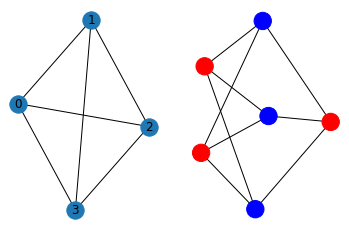

In [123]:
color = ["r" if node[1]['bipartite'] == 1 else "b" for node in K_3_3.nodes(data=True)]
fig, (ax1, ax2) = plt.subplots(1,2)
nx.draw(K_4, ax = ax1, with_labels=True)
nx.draw(K_3_3, ax=ax2, node_color = color)
plt.show()

## Subgraphs

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
[0, 1, 2, 3]


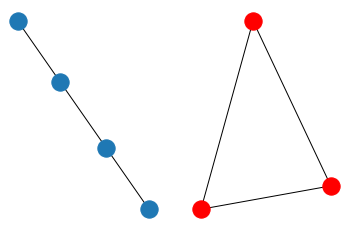

In [22]:
print(K_4.edges())
#Subgraphs made from subset of E(K_4)
H1 = K_4.edge_subgraph([(0,3), (1,3), (1,2)]) 
print(H1.nodes())

fig, (ax1, ax2) = plt.subplots(1,2)
nx.draw(H1, ax=ax1)


# Subgraphs made from a subset of V(K_4)
H2 = K_4.subgraph([0,2,3]) # G-1
nx.draw(H2, ax=ax2, node_color="r")
plt.show()

## Symmetric differences og andre operatorer

In [124]:
from networkx.algorithms import operators

In [125]:
C1 = nx.cycle_graph(5)
C2 = nx.cycle_graph(5)
print(C1.nodes(), C2.nodes())

[0, 1, 2, 3, 4] [0, 1, 2, 3, 4]


['o-0', 'o-1', 'o-2', 'o-3', 'o-4', 'i-0', 'i-1', 'i-2', 'i-3', 'i-4'] 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


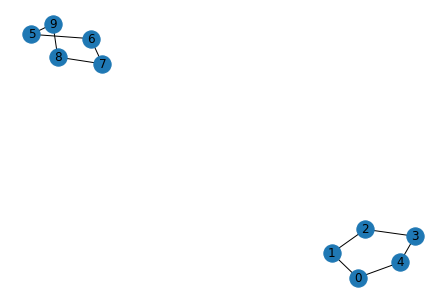

In [25]:
G = operators.binary.union(C1,C2, rename=("o-", "i-") )
G1 = operators.binary.disjoint_union(C1,C2)
print(G.nodes(),"\n", G1.nodes)


nx.draw(G1, with_labels = True)
plt.show()

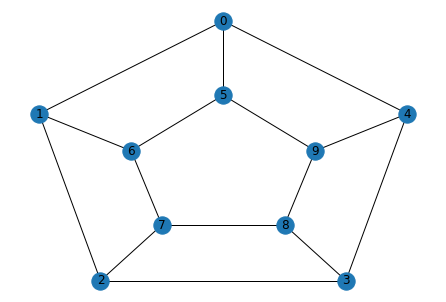

In [26]:
#Vi kan lime disse to grafer sammen
edges = [(i,i+5) for i in G1.nodes() if i <=4]
G1.add_edges_from(edges)


pos1 = {0: (0,10), 1: (-0.3, 7.5), 2: (-0.2, 3), 3: (0.2, 3), 4: (0.3, 7.5), 5: (0,8), 6: (-0.15,6.5), 7: (-0.1,4.5),
      8: (0.1,4.5), 9: (0.15,6.5)}
nx.draw(G1, with_labels = True, pos=pos1)
plt.show()

## Matching og covering

True


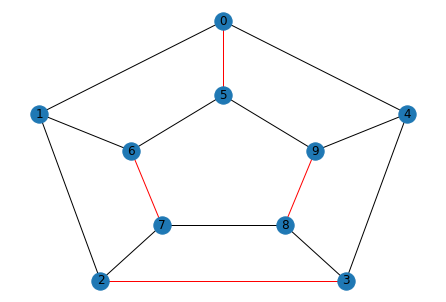

In [27]:
from networkx.algorithms import matching
M = set(((0,5), (6,7), (2,3), (8,9)))
edge_color = ["r" if edge in M else "black" for edge in G1.edges()]
print(matching.is_matching(G, M))
nx.draw(G1, pos = pos1, with_labels=True, edge_color =  edge_color)
plt.show()

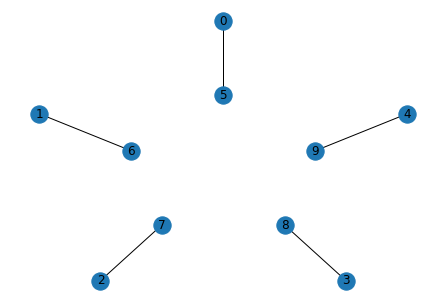

In [29]:
path = nx.Graph()
path.add_nodes_from(G1.nodes())
path.add_edges_from([(1,6), (6,7), (2,7), (2,3), (3,8), (8,9), (9,4)])
#nx.draw(path, pos=pos1, with_labels=True)

m_graph = nx.Graph()
m_graph.add_nodes_from(G1.nodes())
m_graph.add_edges_from(list(M))

new_matching = operators.binary.symmetric_difference(m_graph, path) #Skal have samme knuder

nx.draw(new_matching, pos= pos1, with_labels = True)
plt.show()

In [30]:
M = set(new_matching.edges())
print("Er M en matching i G?: ", matching.is_matching(G1,M))
print("Er M en maximal matching i G?: ",matching.is_maximal_matching(G1, M))
print("Er M en perfekt matching i G?: ", matching.is_perfect_matching(G1, M))

Er M en matching i G?:  True
Er M en maximal matching i G?:  True
Er M en perfekt matching i G?:  True


bipartite.maximum_matching(B) returner følgende dict:  {'x2': 'y1', 'x1': 'y2', 'y1': 'x2', 'y2': 'x1'} 
 matching.maximal_matching(B) giver os sættet:  {('x1', 'y1'), ('x3', 'y2')}
Vores vertex cover bliver:  {'y1', 'y2'}


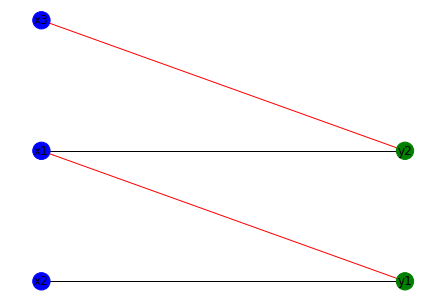

In [31]:
"""
Bemærk at maximum_matching returner et dict, mens maximal_matching returner
et set.
"""
max_matching = nx.bipartite.maximum_matching(B)
max_matching1 = nx.matching.maximal_matching(B)
vertex_cover = nx.bipartite.to_vertex_cover(B, max_matching)
print("bipartite.maximum_matching(B) returner følgende dict: ",max_matching
      ,"\n", "matching.maximal_matching(B) giver os sættet: "
      , max_matching1)
print("Vores vertex cover bliver: ", vertex_cover)

node_color = ["g" if node in vertex_cover else "b" for node in B.nodes()]
edge_color = ["r" if edge in max_matching1 or (edge[1], edge[0]) in max_matching1
              else "black" for edge in B.edges()]
nx.draw(B, pos = pos, with_labels = True, node_color = node_color, edge_color = edge_color)
plt.show()

## Finding a path

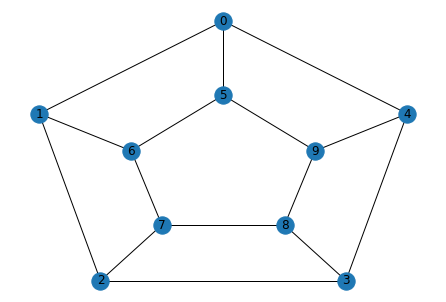

In [32]:
nx.draw(G1, pos=pos1, with_labels=True)
plt.show()

Alle stier fra knude 1 til knude 4:  [1, 0, 4] [1, 2, 3, 4] [1, 0, 5, 9, 4] [1, 6, 5, 9, 4] [1, 6, 5, 0, 4] [1, 2, 7, 8, 9, 4] [1, 2, 3, 8, 9, 4] [1, 6, 7, 8, 9, 4] [1, 2, 7, 8, 3, 4] [1, 6, 7, 2, 3, 4] [1, 6, 7, 8, 3, 4] [1, 0, 5, 9, 8, 3, 4] [1, 6, 5, 9, 8, 3, 4] [1, 2, 7, 6, 5, 0, 4] [1, 2, 7, 6, 5, 9, 4] [1, 0, 5, 6, 7, 8, 9, 4] [1, 2, 7, 8, 9, 5, 0, 4] [1, 2, 3, 8, 9, 5, 0, 4] [1, 6, 7, 8, 9, 5, 0, 4] [1, 6, 7, 2, 3, 8, 9, 4] [1, 0, 5, 6, 7, 2, 3, 4] [1, 0, 5, 6, 7, 8, 3, 4] [1, 2, 3, 8, 7, 6, 5, 0, 4] [1, 0, 5, 9, 8, 7, 2, 3, 4] [1, 6, 5, 9, 8, 7, 2, 3, 4] [1, 2, 7, 6, 5, 9, 8, 3, 4] [1, 2, 3, 8, 7, 6, 5, 9, 4] [1, 6, 7, 2, 3, 8, 9, 5, 0, 4] [1, 0, 5, 6, 7, 2, 3, 8, 9, 4]
Shortest path:  [1, 0, 4]
[(1, 0), (0, 4)]


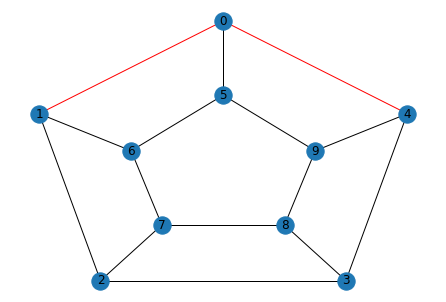

In [33]:
path = list(nx.algorithms.simple_paths.shortest_simple_paths(G1, 1,4))
print("Alle stier fra knude 1 til knude 4: ", *path)
print("Shortest path: ", list(path)[0])

path_edges = [(n, path[0][idx+1]) for idx,n in enumerate(path[0][:-1])]
print(path_edges)
edge_color = ["r" if edge in path_edges or (edge[1], edge[0]) in path_edges else "black" for edge in G1.edges()]
nx.draw(G1, pos=pos1, with_labels=True, edge_color = edge_color)
plt.show()